<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1196 entries, 0 to 1195
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   target  920 non-null    float64
 1   a       1193 non-null   object 
 2   b       1196 non-null   float64
 3   c       1196 non-null   int64  
 4   d       561 non-null    object 
 5   e       1196 non-null   object 
 6   f       1196 non-null   float64
 7   g       1196 non-null   object 
 8   h       1158 non-null   float64
 9   i       1087 non-null   object 
 10  j       591 non-null    float64
 11  k       1196 non-null   float64
 12  l       1196 non-null   float64
 13  m       778 non-null    object 
 14  n       1012 non-null   float64
 15  o       1008 non-null   float64
 16  p       1122 non-null   float64
 17  q       1009 non-null   float64
 18  r       1196 non-null   float64
 19  s       1196 non-null   object 
 20  t       1110 non-null   float64
 21  u       1079 non-null   float64
 22  

c:\Users\belin\OneDrive\Desktop\Machine learning\BEL-BINF5507\Assignment1\Scripts\data_preprocessor.py:22: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  
c:\Users\belin\OneDrive\Desktop\Machine learning\BEL-BINF5507\Assignment1\Scripts\data_preprocessor.py:30: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  for col in numeric_cols:


              precision    recall  f1-score   support

           0       0.70      0.58      0.64        84
           1       0.79      0.87      0.83       156

    accuracy                           0.77       240
   macro avg       0.75      0.72      0.73       240
weighted avg       0.76      0.77      0.76       240

Accuracy: 0.77


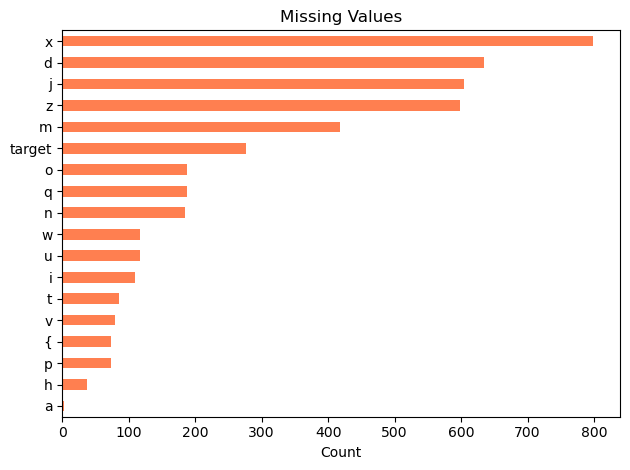

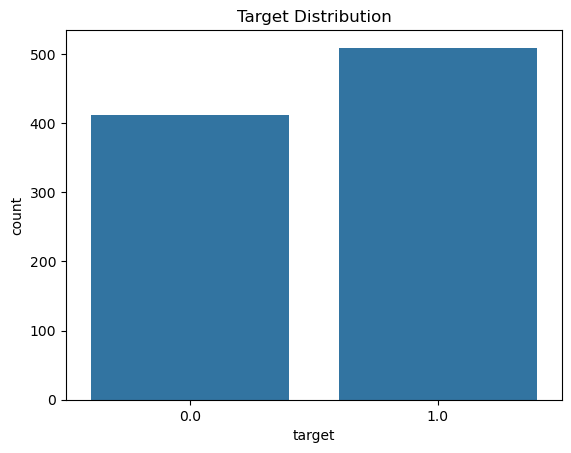

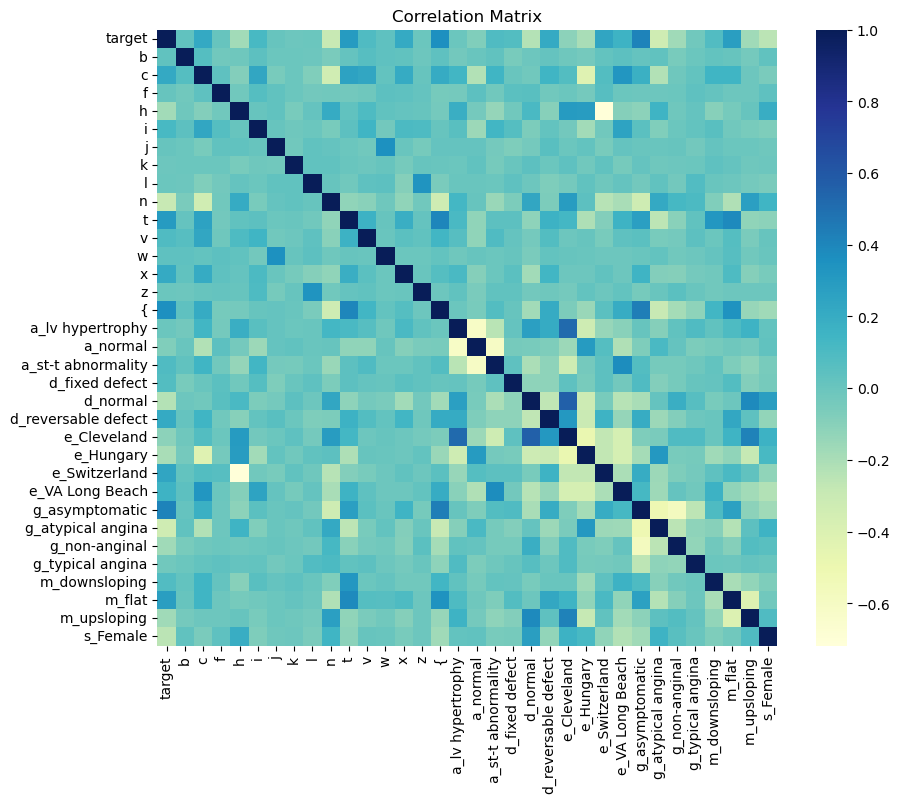

In [9]:
import data_preprocessor as dp
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Load data
import pandas as pd
import data_preprocessor as dp

messy_data = pd.read_csv('../Data/messy_data.csv')
print(messy_data.info())
print(messy_data.describe())
print(messy_data.head())

# Show missing value counts
missing_data = messy_data.isnull().sum()
print("Missing values per column:\n", missing_data)

# Preprocessing pipeline
clean_data = dp.impute_missing_values(messy_data.copy(), strategy='mean')
clean_data = dp.remove_duplicates(clean_data)

# Encode categorical columns before normalization
categorical_cols = clean_data.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    clean_data = pd.get_dummies(clean_data, columns=categorical_cols)

# Normalize numerical data
clean_data = dp.normalize_data(clean_data, method='minmax')

# Remove highly correlated/redundant features
clean_data = dp.remove_redundant_features(clean_data)

# Ensure target column is integer (for classification)
if 'target' in clean_data.columns:
    clean_data['target'] = clean_data['target'].round().astype(int)

# Save cleaned data
clean_data.to_csv('../Data/clean_data.csv', index=False)

# Train and evaluate model
dp.simple_model(clean_data, print_report=True)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Plot missing values
missing = messy_data.isnull().sum()
missing[missing > 0].sort_values().plot(kind='barh', color='coral')
plt.title("Missing Values")
plt.xlabel("Count")
plt.tight_layout()
plt.show()

# Target distribution
sns.countplot(x='target', data=messy_data)
plt.title("Target Distribution")
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(clean_data.corr(), cmap='YlGnBu')
plt.title("Correlation Matrix")
plt.show()



# # Load data
# messy_data = pd.read_csv('../Data/messy_data.csv')
# clean_data = messy_data.copy()
# messy_data.info()
# messy_data.describe()
# messy_data.head()

# missing_data = messy_data.isnull().sum()
# print(missing_data)

# # Impute missing values
# numerical_col_name = []
# categorical_col_name = []

# # Example: Impute missing values for an existing numerical column, e.g., 'n'
# if 'n' in messy_data.columns:
# 	messy_data['n'].fillna(messy_data['n'].mean(), inplace=True)

# # Example: Impute missing values for an existing categorical column, e.g., 'd'
# if 'd' in messy_data.columns:
# 	messy_data['d'].fillna(messy_data['d'].mode()[0], inplace=True)

# # Drop rows with missing values
# messy_data.dropna(inplace=True)

# # Display the dataset after handling missing data
# messy_data.head()
# #Data Preprocessing


# # Preprocess
# clean_data = dp.impute_missing_values(clean_data, strategy='mean')
# clean_data = dp.remove_duplicates(clean_data)

# # Encode categorical columns before normalization
# categorical_cols = clean_data.select_dtypes(include=['object']).columns
# if len(categorical_cols) > 0:
# 	clean_data = pd.get_dummies(clean_data, columns=categorical_cols)

# clean_data = dp.normalize_data(clean_data, method='minmax')
# clean_data = dp.remove_redundant_features(clean_data)

# # Ensure target is integer for classification
# if 'target' in clean_data.columns:
# 	clean_data['target'] = clean_data['target'].round().astype(int)

# # Save cleaned data
# clean_data.to_csv('../Data/clean_data.csv', index=False)

# # Model training and evaluation
# dp.simple_model(clean_data)
